# Classification

## 1. Synthetic dataset

In this section, we create a synthetic dataset for a binary classification problem using pure NumPy operations. The dataset consists of two interleaved semicircles, resembling the well-known “two moons” pattern, which is often used to test nonlinear classification algorithms. The coordinates of each moon are generated using trigonometric functions, and a small amount of Gaussian noise is added to make the problem more realistic. Finally, we visualize the dataset using Matplotlib, where each class is displayed in a different color to highlight the nonlinear decision boundary between them.

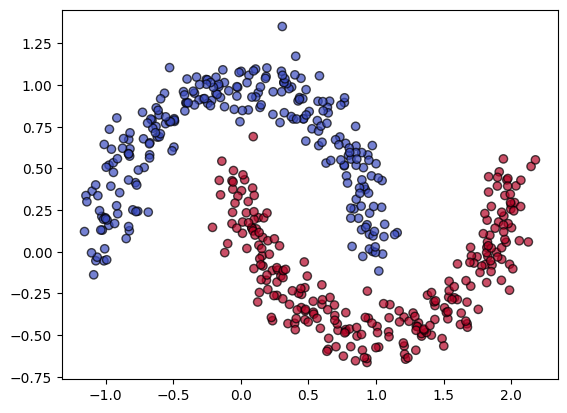

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n_samples = 500
theta = np.linspace(0, np.pi, n_samples // 2)
x_out = np.c_[np.cos(theta), np.sin(theta)]
x_in = np.c_[1 - np.cos(theta), 1 - np.sin(theta) - 0.5]

X = np.vstack([x_out, x_in]) + np.random.normal(0, 0.1, (n_samples, 2))
y = np.hstack([np.zeros(x_out.shape[0]), np.ones(x_in.shape[0])])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor="k", alpha=0.7)
plt.show()

## 2. Train–Test Split

To evaluate a model’s ability to generalize, we divide the dataset into training and testing subsets using pure NumPy operations. This manual split mimics the functionality of train_test_split from scikit-learn but avoids any external dependencies. First, we shuffle the dataset indices to ensure randomization, then select a portion (e.g., 80%) for training and the remaining samples for testing. This separation allows us to train the model on one subset and assess its performance on unseen data, providing a fair measure of its predictive capability.

In [3]:
train_ratio = 0.8
idx = np.random.permutation(len(X))
split = int(train_ratio * len(X))
X_train, X_test = X[idx[:split]], X[idx[split:]]
y_train, y_test = y[idx[:split]], y[idx[split:]]

## 3. Configuring the ANFIS Classifier

In this step, we configure the ANFISClassifier by defining its main hyperparameters. The parameter n_classes specifies the number of output classes in the classification problem. We also define the initialization strategy for the fuzzy membership functions and use the Adam optimizer — an adaptive gradient-based optimization algorithm that combines the advantages of momentum and RMSProp for faster and more stable convergence. Finally, we set the number of training epochs, batch size, and random seed to ensure reproducible results.

In [16]:
from anfis_toolbox import ANFISClassifier

classifier = ANFISClassifier(optimizer="adam", batch_size=128, epochs=300, learning_rate=0.01, random_state=42)

## 4. Training the Model

In this stage, we train the ANFISClassifier using the training set. The `fit()` method iteratively updates the model parameters using the Adam optimizer to minimize the classification error. After training, we evaluate the model on the test data with the `evaluate() method, which computes several performance metrics, including accuracy, precision, recall, and F1-scores (both macro and micro averages). The resulting confusion matrix shows that the classifier correctly distinguishes between the two classes, achieving an overall accuracy of 94%, demonstrating strong generalization on unseen samples.

In [17]:
classifier.fit(X_train, y_train)
result = classifier.evaluate(X_test, y_test)

ANFISClassifier evaluation:
  accuracy: 0.980000
  balanced_accuracy: 0.979968
  precision_macro: 0.979968
  recall_macro: 0.979968
  f1_macro: 0.979968
  precision_micro: 0.980000
  recall_micro: 0.980000
  f1_micro: 0.980000
  confusion_matrix:
    [[47  1]
     [ 1 51]]
  classes: [0 1]


## 6. Visualizing the Decision Boundary

To better understand the classifier’s behavior, we visualize the decision boundary learned by the ANFIS model. We create a fine grid of points covering the entire feature space and use the trained classifier to predict the class probabilities for each point. These probabilities are then plotted as a smooth color map, where the transition between colors illustrates the regions assigned to each class. Finally, the training and testing samples are overlaid on the same plot, allowing us to clearly see how well the decision surface separates the two classes and how the model generalizes to unseen data.

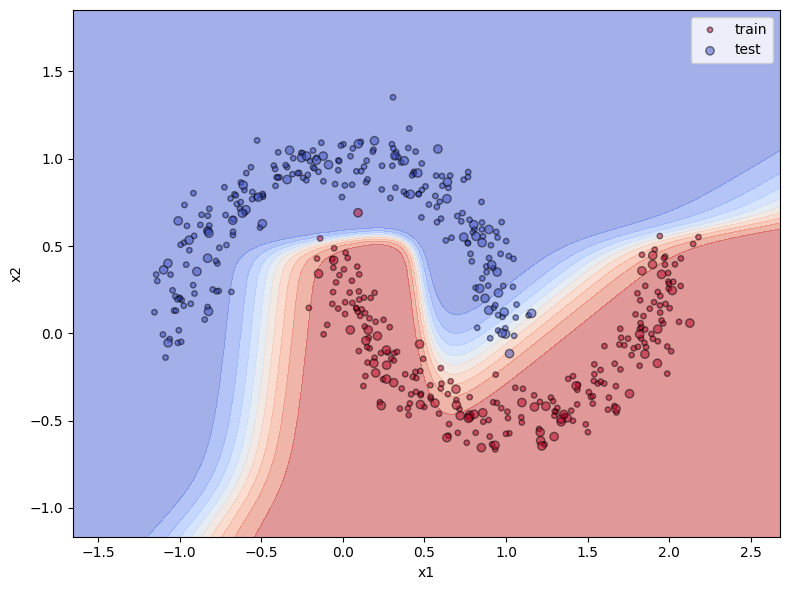

In [19]:
x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()

plus = .5
x_min -= plus
x_max += plus
y_min -= plus
y_max += plus
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 160),
    np.linspace(y_min, y_max, 160)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Calcular probabilidades para cada ponto do grid
probabilities = classifier.predict_proba(grid_points)[:, 1]

plt.figure(figsize=(8, 6))

# Plot decision boundary as a contourf
Z = probabilities.reshape(xx.shape)
contour = plt.contourf(xx, yy, Z, levels=10, cmap="coolwarm", alpha=0.5, vmin=0, vmax=1)

# Plot training and test points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", edgecolor="k", label="train", marker=".", s=60, alpha=0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="coolwarm", edgecolor="k", label="test", marker="o", alpha=0.5)

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.tight_layout()
plt.show()